In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO

import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score

from IPython.display import Image
from scipy.stats import randint

/home/todos/alunos/ct/a1717553/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()

# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)

As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


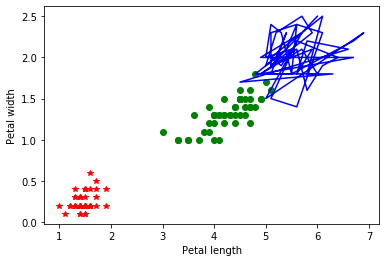

In [51]:
##########################
#Exercício 01
##########################

#plote o gráfico de dispersão. 
#Dica: analise o vetor de labels (y) e plote com cores 
#diferentes as características comprimento e largura da pétala 
#(armazenadas em X) de cada rótulo.
plt.figure()
plt.plot(X[y==0,2],X[y==0,3], 'r*')
plt.plot(X[y==1,2],X[y==1,3], 'go')
plt.plot(X[y==2,2],X[y==2,3], 'b')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


#analise visualmente como seriam as fronteiras de decisão, 
#considerando apenas cortes ortogonais.


In [41]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(90, 4)
(60, 4)
(90,)
(60,)



Accuracy
 0.8833333333333333


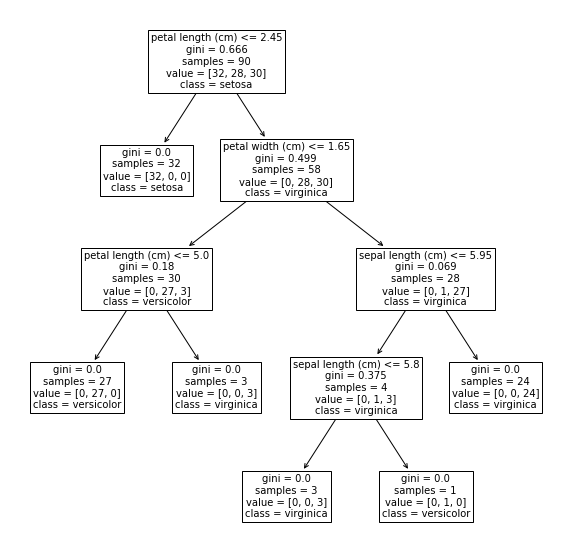

In [42]:
#classificação utilizando uma árvore de decisão não otimizada

#cria o classificador
clf = tree.DecisionTreeClassifier(criterion='gini') #testar com (criterion='entropy')

#treina o classificador com a base de treinamento
clf = clf.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf.predict(X_test)

##########################
#Exercício 02 - A
#mostrar a acurácia
##########################
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 02 - B
##Analise a árvore de decisão criada
##########################
#cria uma imagem para mostrar a árvore de decisão criada
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names);

In [43]:
##########################
#Exercício 02 - C
##Crie um classificador (ie, uma árvore de decisão) com os parâmetros 
##definidos manualmente por você

#procure informações na documentação.
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
##########################


Accuracy
 0.95

Parâmetros e índices do melhor estimador encontrado:
{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 19, 'min_samples_leaf': 5, 'min_samples_split': 18}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=19,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Índices para todos os testes realizados pela RandomizedSearchCV():
0.933 (+/-0.052) for {'criterion': 'entropy', 'max_depth': 12, 'max_leaf_nodes': 13, 'min_samples_leaf': 13, 'min_samples_split': 15}
0.956 (+/-0.081) for {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 19, 'min_samples_leaf': 5, 'min_samples_split': 18}
0.933 (+/-0.052) for {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 16, 'min_s

/home/todos/alunos/ct/a1717553/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/todos/alunos/ct/a1717553/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[Text(125.55000000000001, 190.26, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 90\nvalue = [32, 28, 30]\nclass = setosa'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = setosa'),
 Text(167.4, 135.9, 'petal width (cm) <= 1.65\ngini = 0.499\nsamples = 58\nvalue = [0, 28, 30]\nclass = virginica'),
 Text(83.7, 81.53999999999999, 'petal length (cm) <= 4.75\ngini = 0.18\nsamples = 30\nvalue = [0, 27, 3]\nclass = versicolor'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(251.10000000000002, 81.53999999999999, 'sepal length (cm) <= 6.1\ngini = 0.069\nsamples = 28\nvalue = [0, 1, 27]\nclass = virginica'),
 Text(209.25, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]\nclass

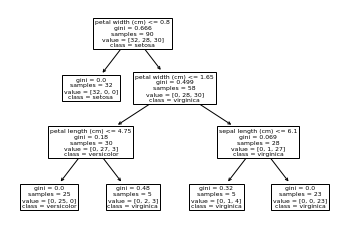

In [55]:
#classificação utilizando uma árvore de decisão otimizada, onde os parâmetros são definidos pela função RandomizedSearchCV

clf_rs = DecisionTreeClassifier()

##########################
#Exercício 03 - A
#Analisar os parâmetros utilizados pela RandomizedSearchCV()
##########################
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": randint(1, 20),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(2, 20)}
   
# roda a randomized search     
clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

##########################
#Exercício 03 - B
#Treinar e testar o classificador. Depois, mostrar as métricas de avaliação 
#(mesmos passos realizados para a árvore não otimizada)
##########################

#treina o classificador com a base de treinamento
clf_rs.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf_rs.predict(X_test)
        
#mostrar a acurácia
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 03 - C
#Analisar os parâmetros (e índices) testados na RandomizedSearchCV()
##########################
print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score'];
stds = clf_rs.cv_results_['std_test_score'];
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
del mean
##########################
#Exercício 03 - D
##Compare a árvore de decisão com a anterior (não-otimizada)
##########################
tree.plot_tree(clf_rs.best_estimator_, feature_names=iris.feature_names, class_names=iris.target_names)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

knn_predict = neigh.predict(X_test)
print("KNN Accuracy: ", sklearn.metrics.accuracy_score(y_test, knn_predict))
# try this later: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

KNN Accuracy:  0.9666666666666667


In [62]:
k_accuracies = {}
for k in range(2,15):
    clf_accuracy = []
    for i in range(10):
        Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size = 0.4, random_state=i)
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(Xtrain, ytrain)
        knn_prediction = knn_clf.predict(Xtest)
        knn_acc = sklearn.metrics.accuracy_score(ytest, knn_prediction)
        clf_accuracy.append(knn_acc)
    print(k,"Accuracy",np.mean(clf_accuracy))
    k_accuracies[k]=np.mean(clf_accuracy)

2 Accuracy 0.9433333333333331
3 Accuracy 0.96
4 Accuracy 0.9516666666666665
5 Accuracy 0.9616666666666666
6 Accuracy 0.9583333333333333
7 Accuracy 0.9699999999999998
8 Accuracy 0.96
9 Accuracy 0.9683333333333332
10 Accuracy 0.96
11 Accuracy 0.9666666666666666
12 Accuracy 0.9649999999999999
13 Accuracy 0.9666666666666666
14 Accuracy 0.9583333333333333
